# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [ ]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser

import pandas as pd, numpy as np, matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
#On importe les données dans un dataframe
historique_immobilier_dataframe = pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')
historique_immobilier_dataframe

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15
...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [ ]:
#On vérifie que le type des données attribué par pandas est cohérent
print(historique_immobilier_dataframe.dtypes)
#les donnes sont coherants

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


In [ ]:
print("Nombre des lignes en doublons {}".format(len(historique_immobilier_dataframe[historique_immobilier_dataframe.duplicated() == True])))

Nombre des lignes en doublons 16


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [ ]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')

print(historique_immobilier_dataframe[historique_immobilier_dataframe['code_type_local'].duplicated() == False][['type_local','code_type_local']])


la liste des différents types de biens immobiliers que nous avons dans les données est ?:
                                  type_local  code_type_local
0                                Appartement                2
18  Local industriel. commercial ou assimilé                4


On observe qu'il y a ? types de biens, et que leurs codes types sont ?.
il ya deux types des biens : appartement et local industriel commerciale et leurs codes 2 et 4

### 3. Nombre de transactions

In [ ]:

#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ?: {}'.format(len(historique_immobilier_dataframe[historique_immobilier_dataframe.duplicated() == False])))

print('le nombre de transactions pour les appartements dans les données est ?: {}'.format(len(historique_immobilier_dataframe[historique_immobilier_dataframe['code_type_local'] == 2])))

print('le nombre de transactions pour les locaux commerciaux dans les données est ?: {}'.format(len(historique_immobilier_dataframe[historique_immobilier_dataframe['code_type_local'] == 4])))


le nombre de transactions dans les données est ?: 26180
le nombre de transactions pour les appartements dans les données est ?: 24353
le nombre de transactions pour les locaux commerciaux dans les données est ?: 1843


### 4. interval de l'historique des données

In [ ]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le {}'.format(historique_immobilier_dataframe['date_mutation'].describe()['min']))
print('la dernière date de transaction dans les données est le {}'.format(historique_immobilier_dataframe['date_mutation'].describe()['max']))

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [ ]:
# Calcul de la colonne
historique_immobilier_dataframe['prix_mettre_carré'] = historique_immobilier_dataframe['valeur_fonciere']/historique_immobilier_dataframe['surface_reelle']
historique_immobilier_dataframe[['valeur_fonciere','surface_reelle','prix_mettre_carré']]

,valeur_fonciere,surface_reelle,prix_mettre_carré
0,5.505597e+05,50,11011.193562
1,1.576492e+06,163,9671.732877
2,6.577574e+05,66,9966.020548
3,2.500868e+05,22,11367.582877
4,1.762667e+05,15,11751.113836
...,...,...,...
26191,4.712239e+05,37,12735.781918
26192,1.982330e+06,150,13215.536370
26193,3.124359e+05,26,12016.765753
26194,1.562234e+05,13,12017.182877


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [ ]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
historique_immobilier_dataframe_appartement = historique_immobilier_dataframe[historique_immobilier_dataframe['type_local']=='Appartement']
historique_immobilier_dataframe_appartement.drop('type_local', axis=1, inplace=True)
df_paris = historique_immobilier_dataframe[historique_immobilier_dataframe['type_local']=='Appartement'][['date_mutation', 'code_postal', 'valeur_fonciere', 'surface_reelle', 'prix_mettre_carré' ]]

<ipython-input-9-022f039f7762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historique_immobilier_dataframe_appartement.drop('type_local', axis=1, inplace=True)


In [ ]:
df_paris

,date_mutation,code_postal,valeur_fonciere,surface_reelle,prix_mettre_carré
0,2017-01-03,75003,5.505597e+05,50,11011.193562
1,2017-01-12,75008,1.576492e+06,163,9671.732877
2,2017-01-10,75008,6.577574e+05,66,9966.020548
3,2017-01-10,75003,2.500868e+05,22,11367.582877
4,2017-01-13,75001,1.762667e+05,15,11751.113836
...,...,...,...,...,...
26189,2021-02-24,75004,8.489150e+05,66,12862.347945
26191,2021-02-25,75004,4.712239e+05,37,12735.781918
26193,2021-03-08,75002,3.124359e+05,26,12016.765753
26194,2021-03-11,75002,1.562234e+05,13,12017.182877


In [ ]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
def calculer_prix_moyens(data):
  df_result = pd.DataFrame({'année': ['2017', '2018','2019', '2020', '2021'],
                              'prix_moyen': [0,0,0,0,0], 'surface_moyenne': [0,0,0,0,0],
                              'prix_mettre_carrée_moyenne': [0,0,0,0,0]})
  prix_moyens = []
  surfaces_moyennes = []
  prix_mettre_carrée_moyennes = []
  for année in df_result['année']:
    filtred_year = data[data['date_mutation'].astype(str).str[:4] == année]
    prix_moyen = filtred_year['valeur_fonciere'].sum()/len(filtred_year)
    prix_moyens.append(prix_moyen)
    surface_moyenne = filtred_year['surface_reelle'].sum()/len(filtred_year)
    surfaces_moyennes.append(surface_moyenne)
    prix_mettre_carrée_moyenne = filtred_year['prix_mettre_carré'].sum()/len(filtred_year)
    prix_mettre_carrée_moyennes.append(prix_mettre_carrée_moyenne)
  df_result['prix_moyen'] = prix_moyens
  df_result['surface_moyenne'] = surfaces_moyennes
  df_result['prix_mettre_carrée_moyenne'] = prix_mettre_carrée_moyennes
  return df_result

In [ ]:
df_moyennes_appartements = calculer_prix_moyens(historique_immobilier_dataframe_appartement)
df_moyennes_appartements

,année,prix_moyen,surface_moyenne,prix_mettre_carrée_moyenne
0,2017,427963.238883,44.627737,9492.859195
1,2018,448055.762541,44.271671,10031.403432
2,2019,461950.057064,43.361645,10562.712581
3,2020,462383.253604,42.900654,10674.872650
4,2021,458771.507203,43.479864,10455.600126


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

<Figure size 1000x1000 with 0 Axes>

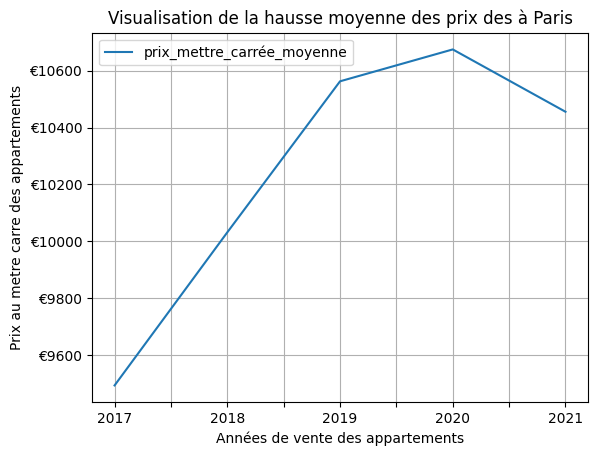

In [ ]:
# On constate que les prix augmentent chaque année jusqu'à 2020 mais la dernière année de 2021 les prix ont diminué.

#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))

df_moyennes_appartements.plot('année', 'prix_mettre_carrée_moyenne')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [ ]:
#Liste des codes postaux dans nos données.
historique_immobilier_dataframe_appartement[historique_immobilier_dataframe_appartement["code_postal"].duplicated()==False]["code_postal"].sort_values(ascending=True )

4       75001
5303    75002
0       75003
5302    75004
479     75005
478     75006
483     75007
1       75008
1074    75009
1072    75010
1579    75011
1581    75012
2287    75013
2469    75014
2762    75015
3281    75016
3729    75017
4210    75018
4783    75019
4781    75020
Name: code_postal, dtype: int64

In [ ]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissements
df_paris_75001 = historique_immobilier_dataframe_appartement[historique_immobilier_dataframe_appartement['code_postal'] == 75001]
df_paris_75001

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,surface_reelle,prix_mettre_carré
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,15,11751.113836
13,2017-01-27,3.766461e+05,111,RUE SAINT DENIS,75001,Paris 1er Arrondissement,2,32,11770.190274
19,2017-02-03,1.270238e+06,20,QUAI DE LA MEGISSERIE,75001,Paris 1er Arrondissement,2,110,11547.615616
22,2017-01-16,8.066500e+05,10,RUE D ALGER,75001,Paris 1er Arrondissement,2,70,11523.572055
24,2017-01-19,4.657374e+05,28,RUE PIERRE LESCOT,75001,Paris 1er Arrondissement,2,40,11643.434384
...,...,...,...,...,...,...,...,...,...
23191,2021-12-01,3.110341e+05,1,RUE DES PYRAMIDES,75001,Paris 1er Arrondissement,2,24,12959.753425
23228,2021-12-09,1.414229e+06,233,RUE SAINT-HONORE,75001,Paris 1er Arrondissement,2,107,13217.089315
23229,2021-12-09,1.229189e+06,233,RUE SAINT-HONORE,75001,Paris 1er Arrondissement,2,93,13217.089315
23355,2021-12-14,7.412535e+05,26,QUAI DU LOUVRE,75001,Paris 1er Arrondissement,2,55,13477.336849


In [ ]:
df_moyennes_75001 = calculer_prix_moyens(df_paris_75001)
df_moyennes_75001

,année,prix_moyen,surface_moyenne,prix_mettre_carrée_moyenne
0,2017,530392.410096,45.241379,11762.706289
1,2018,581390.365711,46.010204,12621.226146
2,2019,454606.244889,34.307692,13269.256149
3,2020,601204.893337,44.871429,13405.991820
4,2021,639321.076138,47.777778,13379.498578


<Figure size 1500x1500 with 0 Axes>

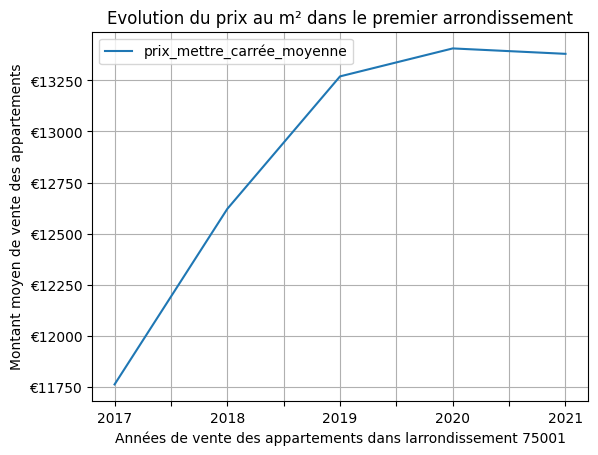

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
df_moyennes_75001.plot('année', 'prix_mettre_carrée_moyenne')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()


Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [ ]:
paris_codes_postaux = historique_immobilier_dataframe_appartement[historique_immobilier_dataframe_appartement["code_postal"].duplicated()==False]["code_postal"].sort_values(ascending=True );

In [ ]:
df_moyennes_all = pd.DataFrame({'année': ['2017', '2018','2019', '2020', '2021']})
for code_postal_item in paris_codes_postaux:
  filtered_data_item = historique_immobilier_dataframe_appartement[historique_immobilier_dataframe_appartement['code_postal'] == code_postal_item]
  df_moyennes_item = calculer_prix_moyens(filtered_data_item)
  colonne_name_item = 'PM-{}'.format(code_postal_item)
  df_moyennes_all[colonne_name_item]=df_moyennes_item['prix_mettre_carrée_moyenne']


In [ ]:
df_moyennes_all

,année,PM-75001,PM-75002,PM-75003,PM-75004,PM-75005,PM-75006,PM-75007,PM-75008,PM-75009,...,PM-75011,PM-75012,PM-75013,PM-75014,PM-75015,PM-75016,PM-75017,PM-75018,PM-75019,PM-75020
0,2017,11762.706289,10920.126562,11679.818729,12407.227522,11306.752404,12508.837036,11845.118831,10132.798372,9582.311203,...,9137.783721,8454.848964,8344.893374,9054.806033,9097.893718,9808.824060,9336.868287,8466.296314,7621.764808,7886.023336
1,2018,12621.226146,11309.461297,12469.997687,13431.886791,12056.438160,12896.276640,12553.177030,10631.299183,10187.210521,...,9688.945219,8937.726508,8755.219424,9433.545087,9328.040835,10244.444401,9880.663007,9152.933880,8265.857054,8485.162808
2,2019,13269.256149,12150.543211,12813.403980,13641.494658,12928.383859,13378.073631,12921.892652,11195.449314,10957.783651,...,10376.908666,9497.677106,9340.366016,10027.167999,9822.107561,10825.033083,10399.607301,9928.336981,8850.261628,9093.992492
3,2020,13405.991820,12181.589810,12834.313205,13104.738603,12959.757302,13807.087614,13109.829386,11702.927736,10981.242522,...,10533.071590,9691.106390,9333.897460,10107.800126,10061.238564,10911.135562,10536.288246,9946.886945,8982.620746,9329.305302
4,2021,13379.498578,11773.445419,12660.546567,12936.958334,12605.843983,13795.048958,13118.135985,11710.094574,10732.184387,...,10351.644701,9657.980179,9164.625982,9993.616203,9971.240600,10790.307817,10372.368746,9665.640629,8828.586057,9114.398249


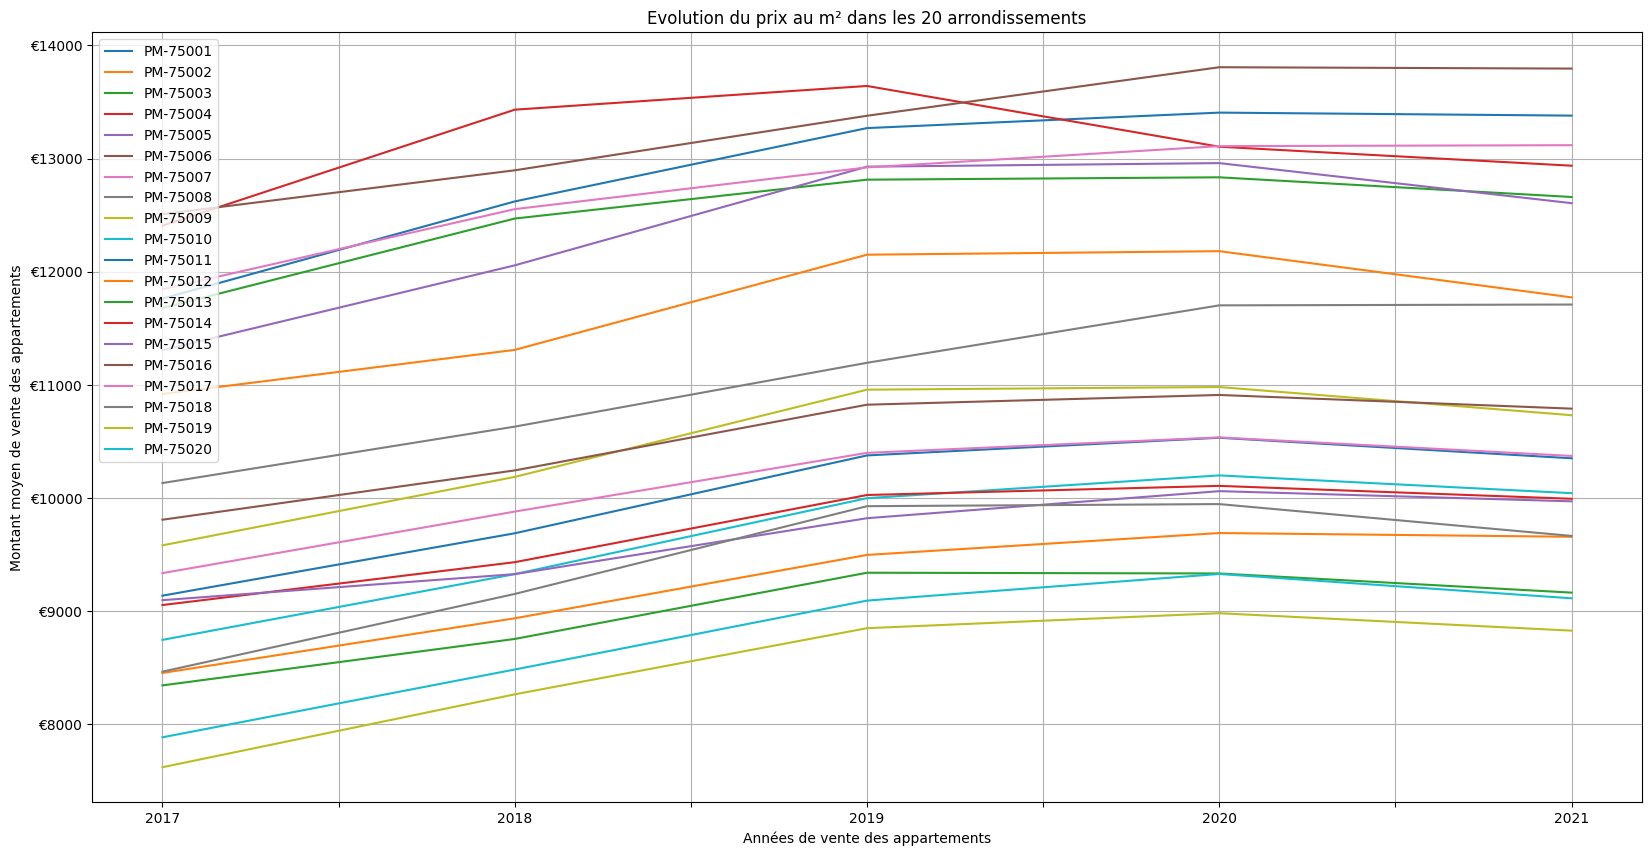

In [ ]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
#plt.figure(figsize=(20,10))
interval_historique=['2017','2018','2019','2020','2021']

#Insérer les lignes à tracer ci-dessous

#df_moyennes_all.plot('année', colormap='cubehelix')
df_moyennes_all.plot('année')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gcf().set_size_inches(20, 10)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que ?: les prix de ventes augmentent jusqu'à 2020 mais diminuent après.


### 7. Prix au metre carré par transaction dans un arrondissement

In [ ]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
historique_75006 = historique_immobilier_dataframe_appartement[historique_immobilier_dataframe_appartement['code_postal'] == 75006]
nbr_transactions_75006 = len(historique_75006)
nbr_transactions_paris = len(historique_immobilier_dataframe_appartement)
print('Le nombre de transaction dans le 6ème est {}. ça répresente {}% des transactions de Paris.'.format(nbr_transactions_75006, round(nbr_transactions_75006/nbr_transactions_paris*100, 2)))

Le nombre de transaction dans le 6ème est 709. ça répresente 2.91% des transactions de Paris.


In [ ]:
historique_75006

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,surface_reelle,prix_mettre_carré
478,2017-01-10,9.601314e+05,169,RUE DE RENNES,75006,Paris 6e Arrondissement,2,78,12309.376712
482,2017-01-13,8.204362e+05,13,RUE DE MEZIERES,75006,Paris 6e Arrondissement,2,68,12065.237671
484,2017-01-13,1.796112e+06,8,RUE JOSEPH BARA,75006,Paris 6e Arrondissement,2,143,12560.221781
488,2017-01-17,2.488198e+05,5,RUE DE CHEVREUSE,75006,Paris 6e Arrondissement,2,20,12440.991370
491,2017-01-19,4.828724e+05,12,RUE NOTRE DAME DES CHAMPS,75006,Paris 6e Arrondissement,2,40,12071.808904
...,...,...,...,...,...,...,...,...,...
24915,2021-12-22,1.360988e+06,1,RUE PAUL SEJOURNE,75006,Paris 6e Arrondissement,2,97,14030.803836
24953,2021-12-16,9.705679e+05,9,RUE DE FLEURUS,75006,Paris 6e Arrondissement,2,72,13480.109589
24956,2021-12-27,2.525194e+05,13,RUE DES CANETTES,75006,Paris 6e Arrondissement,2,18,14028.857260
25013,2021-12-24,6.051571e+05,148,RUE DE RENNES,75006,Paris 6e Arrondissement,2,44,13753.571507


In [ ]:
valeur_fonciere_75006_total = historique_75006['valeur_fonciere'].sum()
valeur_fonciere_paris_total = historique_immobilier_dataframe_appartement['valeur_fonciere'].sum()
print("La valeur foncière globale des appartements de la 6ème répresente: {}%".format(round(valeur_fonciere_75006_total/valeur_fonciere_paris_total*100, 2)))

La valeur foncière globale des appartements de la 6ème répresente: 4.33%


In [ ]:
print(historique_75006['prix_mettre_carré'].mean())
print(historique_immobilier_dataframe_appartement['prix_mettre_carré'].mean())

13143.507481693297
10221.630327764744


On constate que ?

*On constate que les appartements dans le 6ème sont plus cher et ça pourrait faire un bon marché d'investir dans cet arrondissement.*

Affichons l'historique des transactions pour visualiser la dispersion des données :

In [ ]:
historique_75006['count_transactions']=1
historique_75006['year']=historique_75006['date_mutation'].astype(str).str[:4]
historique_75006['year2']=historique_75006['date_mutation'].astype(str).str[:4]
date_mutations = historique_75006['date_mutation']
historique_75006.drop(columns=['date_mutation'], axis=1, inplace=True, errors='ignore')
historique_75006_tr = historique_75006.groupby('year', group_keys=True).sum()
historique_75006['date_mutation']=date_mutations
historique_75006_tr['year2']= historique_75006_tr['year2'].str[:4]
historique_75006_tr[['year2', 'count_transactions']]

<ipython-input-26-4b3554926031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historique_75006['count_transactions']=1
<ipython-input-26-4b3554926031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historique_75006['year']=historique_75006['date_mutation'].astype(str).str[:4]
<ipython-input-26-4b3554926031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,year2,count_transactions
year,,
2017,2017,198
2018,2018,175
2019,2019,123
2020,2020,108
2021,2021,105


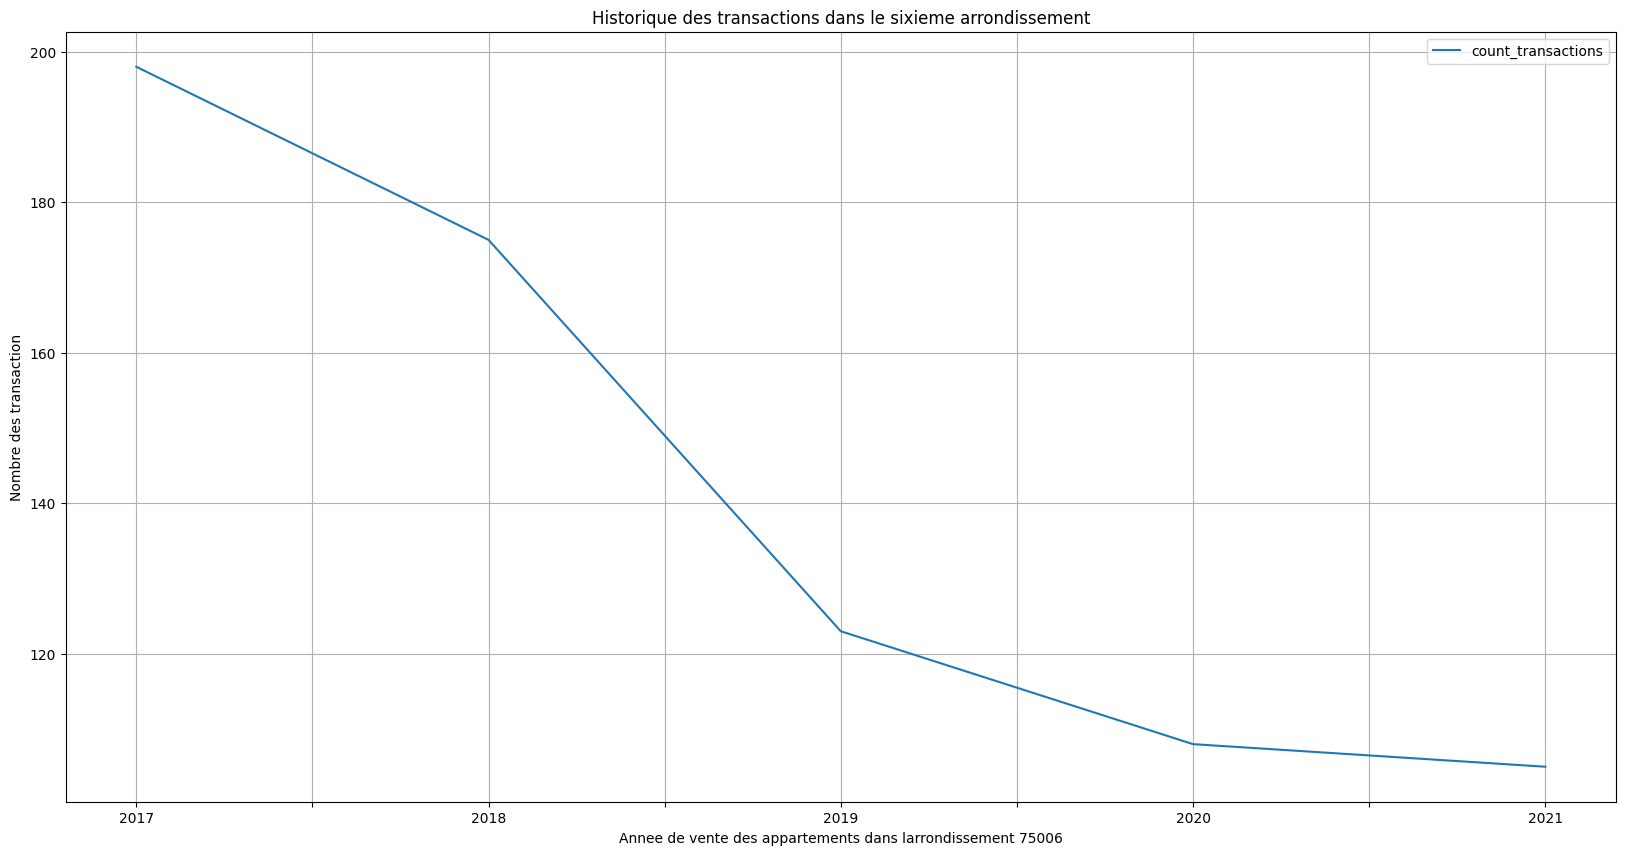

In [ ]:
cp=75006
#Insérer ci-dessous le scatter plot
historique_75006_tr.plot('year2','count_transactions')
plt.xlabel('Annee de vente des appartements dans larrondissement 75006')
plt.ylabel('Nombre des transaction')
#plt.ylabel('Prix du metre carre à la vente des appartements')
plt.gcf().set_size_inches(20, 10)
#plt.ylim(12000,14500)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()


On observe que ?

*On observe que les investissements dans le 6ème diminuent chaque année.*

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [ ]:
#On calcule la corrélation de Spearman
from scipy import stats
correlation, p_value = stats.spearmanr(historique_75006['prix_mettre_carré'], historique_75006['date_mutation'].astype(str))
print('Corrélation de Spearman est {} avec une pvalue de {}'.format(correlation, p_value))


Corrélation de Spearman est 0.9148449773186671 avec une pvalue de 1.1999820574651415e-280


Le coefficient de corrélation est de 0.91 avec une pvalue de 1.2 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [ ]:
correlation, p_value = stats.spearmanr(historique_75006['valeur_fonciere'], historique_75006['surface_reelle'])
print('Spearman: {} et pvalue: {}'.format(correlation, p_value))

Spearman: 0.9977685406899678 et pvalue: 0.0


Le coefficient de corrélation est de 0.997 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [ ]:
historique_immobilier_dataframe

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_mettre_carré
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.781918
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.536370
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.765753
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.182877


In [ ]:
#On crée un dataset qui ne contient que les locaux commerciaux
historique_locaux_commerciaux = historique_immobilier_dataframe[historique_immobilier_dataframe['code_type_local']==4]
historique_locaux_commerciaux

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_mettre_carré
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.289027
...,...,...,...,...,...,...,...,...,...,...
26149,2021-01-13,1.903438e+05,3,RUE SAINT-JOSEPH,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,15,12689.584932
26164,2021-01-26,4.487582e+05,2,RUE GRETRY,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,35,12821.664041
26166,2021-01-13,6.409217e+05,115,RUE D ABOUKIR,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,49,13080.033699
26190,2021-02-26,5.131939e+05,16,RUE AUBRIOT,75004,Paris 4e Arrondissement,4,Local industriel. commercial ou assimilé,37,13870.106137


In [ ]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_moyennes_locaux_commerciaux = calculer_prix_moyens(historique_locaux_commerciaux)
df_moyennes_locaux_commerciaux

,année,prix_moyen,surface_moyenne,prix_mettre_carrée_moyenne
0,2017,9.654594e+05,89.991404,10949.909217
1,2018,1.003463e+06,88.096866,11569.499180
2,2019,9.928222e+05,82.826389,11960.132050
3,2020,1.034380e+06,85.630952,11966.470204
4,2021,1.129357e+06,92.832000,12006.488691


In [ ]:
df_moyennes_appartements

,année,prix_moyen,surface_moyenne,prix_mettre_carrée_moyenne
0,2017,427963.238883,44.627737,9492.859195
1,2018,448055.762541,44.271671,10031.403432
2,2019,461950.057064,43.361645,10562.712581
3,2020,462383.253604,42.900654,10674.872650
4,2021,458771.507203,43.479864,10455.600126


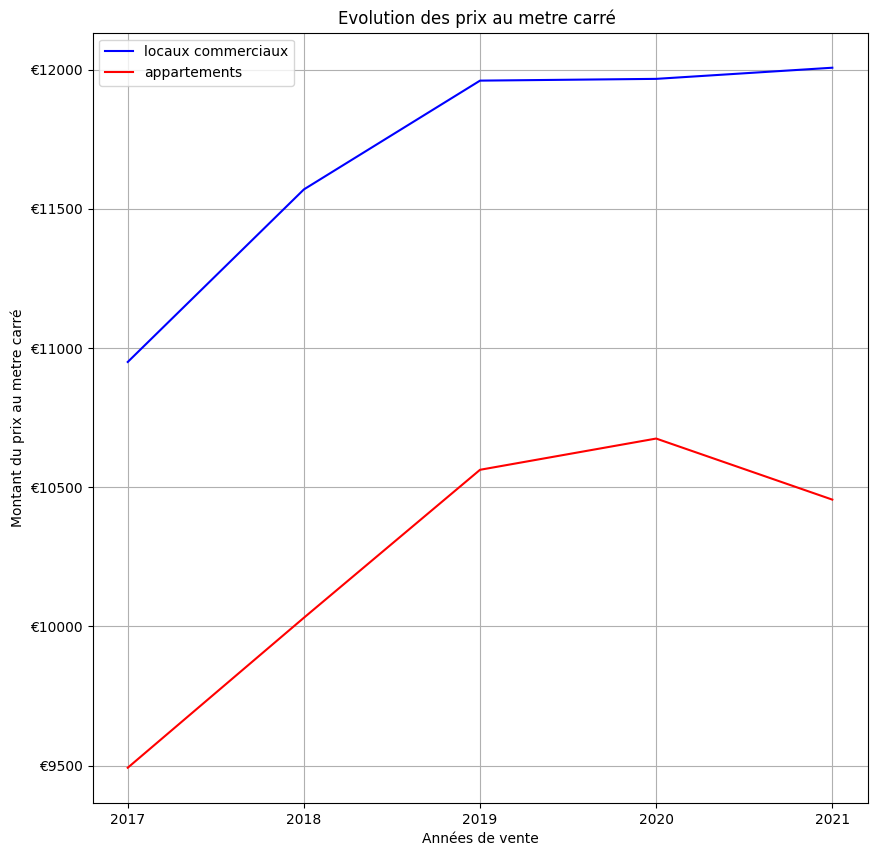

In [ ]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'], df_moyennes_locaux_commerciaux['prix_mettre_carrée_moyenne'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'], df_moyennes_appartements['prix_mettre_carrée_moyenne'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?: *plus élévé que le prix des appartements*

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [ ]:
import datetime as dt
historique_immobilier_dataframe['date_mutation_seconds']= (historique_immobilier_dataframe['date_mutation'] - dt.datetime(1970,1,1)).dt.total_seconds()
conditions = [
    (historique_immobilier_dataframe['surface_reelle'] <= 15),
    (historique_immobilier_dataframe['surface_reelle'] > 15) & (historique_immobilier_dataframe['surface_reelle'] <= 25),
    (historique_immobilier_dataframe['surface_reelle'] > 25) & (historique_immobilier_dataframe['surface_reelle'] <= 45),
    (historique_immobilier_dataframe['surface_reelle'] > 45) & (historique_immobilier_dataframe['surface_reelle'] <= 55),
    (historique_immobilier_dataframe['surface_reelle'] > 55) & (historique_immobilier_dataframe['surface_reelle'] <= 70),
    (historique_immobilier_dataframe['surface_reelle'] > 70) & (historique_immobilier_dataframe['surface_reelle'] <= 100),
    (historique_immobilier_dataframe['surface_reelle'] > 100) & (historique_immobilier_dataframe['surface_reelle'] <= 150),
    (historique_immobilier_dataframe['surface_reelle'] > 150) & (historique_immobilier_dataframe['surface_reelle'] <= 500),
    (historique_immobilier_dataframe['surface_reelle'] > 500)
    ]
values = ['studette', 'studio', 'f2', 'f3', 'f4', 'f5', 'maison', 'maison_avec_jardin', 'chateau']
historique_immobilier_dataframe['surface_tier'] = np.select(conditions, values)
df_encoded = pd.get_dummies(historique_immobilier_dataframe, columns=['code_postal', 'code_type_local', 'surface_tier'])
print(df_encoded.dtypes)

date_mutation                      datetime64[ns]
valeur_fonciere                           float64
adresse_numero                              int64
adresse_nom_voie                           object
nom_commune                                object
type_local                                 object
surface_reelle                              int64
prix_mettre_carré                         float64
date_mutation_seconds                     float64
code_postal_75001                            bool
code_postal_75002                            bool
code_postal_75003                            bool
code_postal_75004                            bool
code_postal_75005                            bool
code_postal_75006                            bool
code_postal_75007                            bool
code_postal_75008                            bool
code_postal_75009                            bool
code_postal_75010                            bool
code_postal_75011                            bool


In [ ]:
df_encoded['valeur_fonciere_floor']=np.floor(df_encoded['valeur_fonciere'])
df_encoded['valeur_fonciere_floor']

0         550559.0
1        1576492.0
2         657757.0
3         250086.0
4         176266.0
           ...    
26191     471223.0
26192    1982330.0
26193     312435.0
26194     156223.0
26195     369429.0
Name: valeur_fonciere_floor, Length: 26196, dtype: float64

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [ ]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
colonnes = ['date_mutation_seconds', 'code_type_local_2', 'code_type_local_4',
            'code_postal_75001', 'code_postal_75002', 'code_postal_75003', 'code_postal_75004', 'code_postal_75005',
            'code_postal_75006', 'code_postal_75007', 'code_postal_75008', 'code_postal_75009', 'code_postal_75010',
            'code_postal_75011', 'code_postal_75012', 'code_postal_75013', 'code_postal_75014', 'code_postal_75015',
            'code_postal_75016', 'code_postal_75017', 'code_postal_75018', 'code_postal_75019', 'code_postal_75020',
            'surface_tier_studette','surface_tier_studio', 'surface_tier_f2', 'surface_tier_f3', 'surface_tier_f4',
            'surface_tier_f5', 'surface_tier_maison', 'surface_tier_maison_avec_jardin', 'surface_tier_chateau']
X_train, X_test, y_train, y_test = train_test_split(df_encoded[colonnes], df_encoded['valeur_fonciere_floor'], test_size=0.33)

In [ ]:
X_train

,date_mutation_seconds,code_type_local_2,code_type_local_4,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75020,surface_tier_studette,surface_tier_studio,surface_tier_f2,surface_tier_f3,surface_tier_f4,surface_tier_f5,surface_tier_maison,surface_tier_maison_avec_jardin,surface_tier_chateau
21988,1.625443e+09,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9317,1.530058e+09,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2758,1.513901e+09,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12353,1.571702e+09,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21544,1.620086e+09,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21331,1.617667e+09,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2097,1.506038e+09,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11178,1.558051e+09,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11698,1.559866e+09,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#conversion des données en str
X_train_str = X_train.replace({True: '1', False: '0'})
X_test_str = X_test.replace({True: '1', False: '0'})

In [ ]:
X_train_str

,date_mutation_seconds,code_type_local_2,code_type_local_4,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75020,surface_tier_studette,surface_tier_studio,surface_tier_f2,surface_tier_f3,surface_tier_f4,surface_tier_f5,surface_tier_maison,surface_tier_maison_avec_jardin,surface_tier_chateau
21988,1.625443e+09,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9317,1.530058e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2758,1.513901e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12353,1.571702e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21544,1.620086e+09,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21331,1.617667e+09,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2097,1.506038e+09,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11178,1.558051e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11698,1.559866e+09,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

#On entraîne l'algorithme ci-dessous et on effectue la prédiction
model = LinearRegression();
model.fit(X_train_str, y_train);

y_pred = model.predict(X_test_str)

mae = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)/len(df_encoded)

print('mae {}'.format(mae))
print('mse {}'.format(mse))
print('rmse {}'.format(rmse))

mae 0.14985199932876608
mse 25301028565.056858
rmse 6.072032769871798


In [ ]:
print('Notre algorithme fait donc {} % d\'erreur en moyenne sur la prédiction de la valeur foncière.'.format(round(rmse, 2)))

Notre algorithme fait donc 6.07 % d'erreur en moyenne sur la prédiction de la valeur foncière.


Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- bon résultat parce que le taux d'erreur est rélativement faible: 6.07%;
- d'autres informations sont suceptibles d'améliorer ce modèle de prédiction comme par exemple: nombre des pièces, avec ou sans balecon, étage, ...
- volume des données utilisées est rélativement petite (26000 transactions surtout les locaux commerciaux juste 1800) et une plus grande volume pourrait méner à un résultat meilleur.
- autres modèles de prédictions peuvent être plus appropriés que LinearRegression comme par example: decision trees, random forests, support vector machines, and neural networks.

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [ ]:
#On importe les données dans un dataframe
portefeuille_dataframe = pd.read_excel('portefeuille_actifs.xlsx')
portefeuille_dataframe

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490
...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mètre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [ ]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
portefeuille_conditions = [
    (portefeuille_dataframe['surface_reelle_bati'] <= 15),
    (portefeuille_dataframe['surface_reelle_bati'] > 15) & (portefeuille_dataframe['surface_reelle_bati'] <= 25),
    (portefeuille_dataframe['surface_reelle_bati'] > 25) & (portefeuille_dataframe['surface_reelle_bati'] <= 45),
    (portefeuille_dataframe['surface_reelle_bati'] > 45) & (portefeuille_dataframe['surface_reelle_bati'] <= 55),
    (portefeuille_dataframe['surface_reelle_bati'] > 55) & (portefeuille_dataframe['surface_reelle_bati'] <= 70),
    (portefeuille_dataframe['surface_reelle_bati'] > 70) & (portefeuille_dataframe['surface_reelle_bati'] <= 100),
    (portefeuille_dataframe['surface_reelle_bati'] > 100) & (portefeuille_dataframe['surface_reelle_bati'] <= 150),
    (portefeuille_dataframe['surface_reelle_bati'] > 150) & (portefeuille_dataframe['surface_reelle_bati'] <= 500),
    (portefeuille_dataframe['surface_reelle_bati'] > 500)
    ]
portefeuille_values = ['studette', 'studio', 'f2', 'f3', 'f4', 'f5', 'maison', 'maison_avec_jardin', 'chateau']
portefeuille_dataframe['surface_tier'] = np.select(portefeuille_conditions, portefeuille_values)
df_encoded_portefeuille = pd.get_dummies(portefeuille_dataframe, columns=['code_postal', 'code_type_local', 'surface_tier'])


In [ ]:
df_encoded_portefeuille.dtypes

adresse_numero                       int64
adresse_nom_voie                    object
code_commune                         int64
nom_commune                         object
surface_carrez                     float64
type_local                          object
surface_reelle_bati                  int64
nombre_pieces_principales            int64
longitude                          float64
latitude                           float64
code_postal_75001                     bool
code_postal_75002                     bool
code_postal_75003                     bool
code_postal_75004                     bool
code_postal_75005                     bool
code_postal_75006                     bool
code_postal_75007                     bool
code_postal_75008                     bool
code_postal_75009                     bool
code_postal_75010                     bool
code_postal_75011                     bool
code_postal_75012                     bool
code_postal_75013                     bool
code_postal

In [ ]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_encoded_portefeuille['date_mutation'] = dt.datetime(2022,12,31)
df_encoded_portefeuille['date_mutation_seconds']= (df_encoded_portefeuille['date_mutation'] - dt.datetime(1970,1,1)).dt.total_seconds()
print(df_encoded_portefeuille.dtypes)

adresse_numero                              int64
adresse_nom_voie                           object
code_commune                                int64
nom_commune                                object
surface_carrez                            float64
type_local                                 object
surface_reelle_bati                         int64
nombre_pieces_principales                   int64
longitude                                 float64
latitude                                  float64
code_postal_75001                            bool
code_postal_75002                            bool
code_postal_75003                            bool
code_postal_75004                            bool
code_postal_75005                            bool
code_postal_75006                            bool
code_postal_75007                            bool
code_postal_75008                            bool
code_postal_75009                            bool
code_postal_75010                            bool


In [ ]:
#Conversion du dataframe en str
df_encoded_portefeuille_str = df_encoded_portefeuille.replace({True: '1', False: '0'})
df_encoded_portefeuille_str

,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,...,surface_tier_f2,surface_tier_f3,surface_tier_f4,surface_tier_f5,surface_tier_maison,surface_tier_maison_avec_jardin,surface_tier_studette,surface_tier_studio,date_mutation,date_mutation_seconds
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,Appartement,25,1,2.349593,48.863227,...,0,0,0,0,0,0,0,1,2022-12-31,1.672445e+09
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,Appartement,22,1,2.356977,48.867907,...,0,0,0,0,0,0,0,1,2022-12-31,1.672445e+09
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,Appartement,65,3,2.364855,48.859318,...,0,0,1,0,0,0,0,0,2022-12-31,1.672445e+09
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,Appartement,74,2,2.301586,48.868893,...,0,0,0,1,0,0,0,0,2022-12-31,1.672445e+09
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,Appartement,22,1,2.311643,48.875490,...,0,0,0,0,0,0,0,1,2022-12-31,1.672445e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75119,Paris 19e Arrondissement,14.12,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397,...,0,0,0,0,0,0,0,1,2022-12-31,1.672445e+09
271,3,RUE SAINT-JOSEPH,75102,Paris 2e Arrondissement,14.10,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196,...,0,0,0,0,0,0,1,0,2022-12-31,1.672445e+09
272,2,RUE GRETRY,75102,Paris 2e Arrondissement,34.85,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514,...,1,0,0,0,0,0,0,0,2022-12-31,1.672445e+09
273,115,RUE D ABOUKIR,75102,Paris 2e Arrondissement,41.61,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784,...,0,1,0,0,0,0,0,0,2022-12-31,1.672445e+09


In [ ]:
colonnes = ['date_mutation_seconds', 'code_type_local_2', 'code_type_local_4',
            'code_postal_75001', 'code_postal_75002', 'code_postal_75003', 'code_postal_75004', 'code_postal_75005',
            'code_postal_75006', 'code_postal_75007', 'code_postal_75008', 'code_postal_75009', 'code_postal_75010',
            'code_postal_75011', 'code_postal_75012', 'code_postal_75013', 'code_postal_75014', 'code_postal_75015',
            'code_postal_75016', 'code_postal_75017', 'code_postal_75018', 'code_postal_75019', 'code_postal_75020',
            'surface_tier_studette','surface_tier_studio', 'surface_tier_f2', 'surface_tier_f3', 'surface_tier_f4',
            'surface_tier_f5', 'surface_tier_maison', 'surface_tier_maison_avec_jardin', 'surface_tier_chateau']
new_df_encoded_portefeuille_str = df_encoded_portefeuille_str.filter(colonnes, axis=1)
new_df_encoded_portefeuille_str['surface_tier_chateau']='0'


In [ ]:
new_df_encoded_portefeuille_str

,date_mutation_seconds,code_type_local_2,code_type_local_4,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75020,surface_tier_studette,surface_tier_studio,surface_tier_f2,surface_tier_f3,surface_tier_f4,surface_tier_f5,surface_tier_maison,surface_tier_maison_avec_jardin,surface_tier_chateau
0,1.672445e+09,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.672445e+09,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.672445e+09,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.672445e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.672445e+09,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1.672445e+09,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
271,1.672445e+09,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
272,1.672445e+09,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
273,1.672445e+09,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [ ]:
#On effectue la prédiction
predict_portefeuille = model.predict(new_df_encoded_portefeuille_str)
#On vérifie les 10 premières valeurs
predict_portefeuille

array([ 399975.77315648,  357946.41350207,  784617.64265981,
        941812.22132197,  288454.30803894,  428381.61445528,
        357946.41350207,  634389.93427113,  166741.54043364,
        149919.55700786,  380706.26458383,  223956.97474171,
        347646.01152974,  363884.28115805,  288454.30803894,
       1263798.00025096, 1011304.3267851 ,  347646.01152974,
        857838.69933067,  344408.09246398,  363884.28115805,
        453227.65423144,  166741.54043364,  524283.10652435,
        197475.34231765,  524283.10652435,  894136.87145051,
        894136.87145051,  675749.35852934,  207718.7051134 ,
        223956.97474171,  347646.01152974,  541105.08995013,
        207718.7051134 , 1354776.96597225,  207718.7051134 ,
        541105.08995013,  223956.97474171,  207718.7051134 ,
        239262.93008126,  357946.41350207,  363884.28115805,
        337402.64873399,  166741.54043364,  363884.28115805,
        347646.01152974,  207718.7051134 ,  541105.08995013,
        337402.64873399,

In [ ]:
portefeuille_dataframe['valeur_fonciere_floor']=predict_portefeuille
portefeuille_dataframe

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,surface_tier,valeur_fonciere_floor
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,studio,399975.773156
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,studio,357946.413502
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,f4,784617.642660
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,f5,941812.221322
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,studio,288454.308039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397,studio,334256.932605
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196,studette,369039.076639
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514,f2,583003.800789
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784,f3,743402.626155


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [ ]:
#Valorisation du portefeuille sur le segment des particuliers
valorisation_particuliers = portefeuille_dataframe[portefeuille_dataframe['code_type_local']==2]['valeur_fonciere_floor'].sum()/1000000
print('la valorisation du segment particulier est (en millions d\'euros): {}'.format(valorisation_particuliers))



la valorisation du segment particulier est (en millions d'euros): 69.44925682788757


In [ ]:
#Valorisation du portefeuille sur le segment corporate
valorisation_corporate = portefeuille_dataframe[portefeuille_dataframe['code_type_local']==4]['valeur_fonciere_floor'].sum()/1000000
print('la valorisation du segment corporate est (en millions d\'euros): {}'.format(valorisation_corporate))


la valorisation du segment corporate est (en millions d'euros): 104.03456464597286


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- le segment corporate est plus rentable
- taux d'erreur relativement élevé de 8.5% à prendre en compte.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [ ]:
#On importe les données dans un dataframe
df_echantillon_a_classer2 = pd.read_excel('echantillon_a_classer2.xlsx')
df_echantillon_a_classer2

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20
5,179676.304545,75019,Paris 19e Arrondissement,18
6,241856.569418,75019,Paris 19e Arrondissement,25
7,462981.797149,75019,Paris 19e Arrondissement,63
8,518819.726233,75019,Paris 19e Arrondissement,53
9,403670.310822,75019,Paris 19e Arrondissement,53


In [ ]:
df_echantillon_a_classer2.dtypes

valeur_fonciere    float64
code_postal          int64
nom_commune         object
surface_reelle       int64
dtype: object

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [ ]:
df_echantillon_a_classer2_pour_kmeans=pd.DataFrame();
df_echantillon_a_classer2_pour_kmeans['prix_mettre_carré']=df_echantillon_a_classer2['valeur_fonciere']/df_echantillon_a_classer2['surface_reelle']
df_echantillon_a_classer2_pour_kmeans

,prix_mettre_carré
0,9871.444128
1,10045.572493
2,9194.697790
3,9469.142168
4,7463.610005
5,9982.016919
6,9674.262777
7,7348.917415
8,9789.051438
9,7616.420959


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [ ]:
from sklearn.cluster import KMeans

km  = KMeans(n_clusters=2)
km.fit(df_echantillon_a_classer2_pour_kmeans)
labels = km.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# On vérifie les données de la prédiction
labels


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [ ]:
#On affiche les résultats
df_echantillon_a_classer2_pour_kmeans['kmeans'] = labels
df_echantillon_a_classer2_pour_kmeans

,prix_mettre_carré,kmeans
0,9871.444128,0
1,10045.572493,0
2,9194.697790,0
3,9469.142168,0
4,7463.610005,1
5,9982.016919,0
6,9674.262777,0
7,7348.917415,1
8,9789.051438,0
9,7616.420959,1


In [ ]:
df_echantillon_a_classer2_pour_kmeans = df_echantillon_a_classer2_pour_kmeans.replace({1: 'Appartement', 0: 'Local industriel. commercial ou assimilé'})
df_echantillon_a_classer2_pour_kmeans

,prix_mettre_carré,kmeans
0,9871.444128,Local industriel. commercial ou assimilé
1,10045.572493,Local industriel. commercial ou assimilé
2,9194.697790,Local industriel. commercial ou assimilé
3,9469.142168,Local industriel. commercial ou assimilé
4,7463.610005,Appartement
5,9982.016919,Local industriel. commercial ou assimilé
6,9674.262777,Local industriel. commercial ou assimilé
7,7348.917415,Appartement
8,9789.051438,Local industriel. commercial ou assimilé
9,7616.420959,Appartement


In [ ]:
# regroupement des données
df_echantillon_a_classer2['type_local']=df_echantillon_a_classer2_pour_kmeans['kmeans']
df_echantillon_a_classer2

,valeur_fonciere,code_postal,nom_commune,surface_reelle,type_local
0,868687.083271,75019,Paris 19e Arrondissement,88,Local industriel. commercial ou assimilé
1,452050.762192,75019,Paris 19e Arrondissement,45,Local industriel. commercial ou assimilé
2,193088.653587,75019,Paris 19e Arrondissement,21,Local industriel. commercial ou assimilé
3,303012.549370,75019,Paris 19e Arrondissement,32,Local industriel. commercial ou assimilé
4,149272.200110,75019,Paris 19e Arrondissement,20,Appartement
5,179676.304545,75019,Paris 19e Arrondissement,18,Local industriel. commercial ou assimilé
6,241856.569418,75019,Paris 19e Arrondissement,25,Local industriel. commercial ou assimilé
7,462981.797149,75019,Paris 19e Arrondissement,63,Appartement
8,518819.726233,75019,Paris 19e Arrondissement,53,Local industriel. commercial ou assimilé
9,403670.310822,75019,Paris 19e Arrondissement,53,Appartement


In [ ]:
# Evaluation de la performance du Kmeans
# Tester le kmean sur les données de portfeuille
from sklearn.metrics import confusion_matrix, classification_report

portefeuille_dataframe_classification = pd.read_excel('portefeuille_actifs.xlsx')
portefeuille_dataframe_classification['valeur_fonciere_floor']=portefeuille_dataframe['valeur_fonciere_floor']
portefeuille_dataframe_classification['prix_mettre_carré']=portefeuille_dataframe_classification['valeur_fonciere_floor']/portefeuille_dataframe_classification['surface_reelle_bati']
portefeuille_dataframe_classification.drop(['valeur_fonciere_floor', 'surface_reelle_bati', 'surface_carrez', 'longitude', 'latitude', 'nombre_pieces_principales', 'adresse_nom_voie', 'nom_commune', 'code_postal'], axis=1, inplace=True)
portefeuille_dataframe_classification_extrat = portefeuille_dataframe_classification.filter(['prix_mettre_carré'], axis=1)
portefeuille_dataframe_classification_extrat

km.fit(portefeuille_dataframe_classification_extrat)
y_pred = km.labels_
y_true = portefeuille_dataframe_classification['code_type_local'].replace({2: 1, 4: 0})

print('Confusion matrix:')
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("true négatif: {} {}%".format(tn, round(tn/len(y_true)*100)))
print("faux positif: {} {}%".format(fp, round(fp/len(y_true)*100)))
print("faux negatif: {} {}%".format(fn, round(fn/len(y_true)*100)))
print("true positif: {} {}%".format(tp, round(tp/len(y_true)*100)))

report = classification_report(y_true, y_pred)

print('Classification Report:')
print(report)


Confusion matrix:
true négatif: 50 18%
faux positif: 71 26%
faux negatif: 10 4%
true positif: 144 52%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.41      0.55       121
           1       0.67      0.94      0.78       154

    accuracy                           0.71       275
   macro avg       0.75      0.67      0.67       275
weighted avg       0.74      0.71      0.68       275



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Les prix de l'immobilier à Paris que se soit appartements ou locaux commerciaux ont commencé de stagner voir diminuer à partir de 2019, surtout les prix des appartements qui ont régressé significativement entre 2020 et 2021;
- Les transactions de l'entreprise ont commencé à diminuer depuis 2019. Ce qui pourrait être expliqué par la diminution des prix, donc la diminution des bonnes offres des ventes;
- En utilisant un algorithme de prédiction (régression linéaire), on a pû prédire les prix des actifs du portefeuille de l'entreprise au 31 décembre 2022.
- Selon cette prédiction, on trouve que la valorisation de l'offre corporate (locaux commerciaux) est plus élevée que la valorisation offre particulier (appartements);
- Les analyses précédentes montrent bien que l'offre corporate est plus intéressant que l'offre particulier;
- Il faut prendre en compte le taux d'erreur à 6.07% de l'algorithme de prédiction utilisé dans le calcul des valorisations du portefeuille.
- En utilisant l'algorithme de classification non supervisée "kmeans" et juste les prix au mètre carré, on a pû classifier les biens immobiliers du portefeuille de l’entreprise entre corporate ou particulier.
- Il faut prendre en compte les précision à 83% pour l'offre corporate et 67% pour  l'offre particulier de l'algorithme de classification utilisé.